In [3]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")
df = pd.read_csv(f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")

Path to dataset files: /Users/nikitabykov/.cache/kagglehub/datasets/anthonypino/melbourne-housing-market/versions/27/MELBOURNE_HOUSE_PRICES_LESS.csv


In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [ ]:
no_strings = df.drop(['Suburb','Address','Method','SellerG','Date','Regionname','CouncilArea','Type', 'Bedroom2'], axis=1)

In [ ]:
no_strings = no_strings[no_strings['BuildingArea']!=0]

In [ ]:
no_strings.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [ ]:
no_strings.isna().sum()

,0
Rooms,0
Price,7595
Distance,1
Postcode,1
Bathroom,8226
Car,8726
Landsize,11790
BuildingArea,21115
YearBuilt,19304
Lattitude,7976


In [ ]:
for column in no_strings.columns:
      no_strings[column] = no_strings[column].fillna(no_strings[column].median())

In [ ]:
no_strings.isna().sum()

,0
Rooms,0
Price,0
Distance,0
Postcode,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0
Lattitude,0


In [ ]:
no_strings = no_strings.drop(no_strings[no_strings.YearBuilt<1800].index)
no_strings = no_strings.drop(no_strings[no_strings.YearBuilt>2019].index)

no_strings = no_strings.drop(no_strings[no_strings.BuildingArea>2000].index)

no_strings = no_strings.drop(no_strings[no_strings.Landsize>24000].index)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

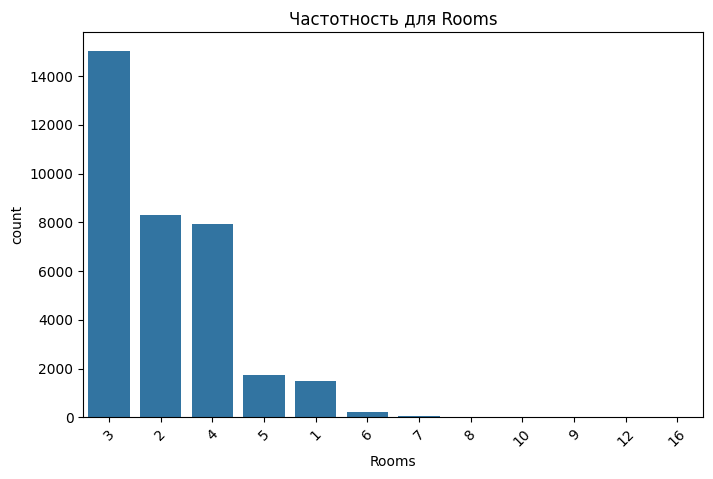

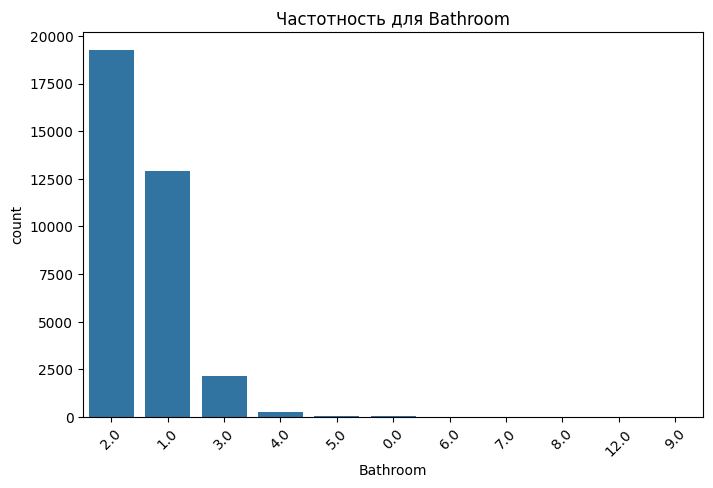

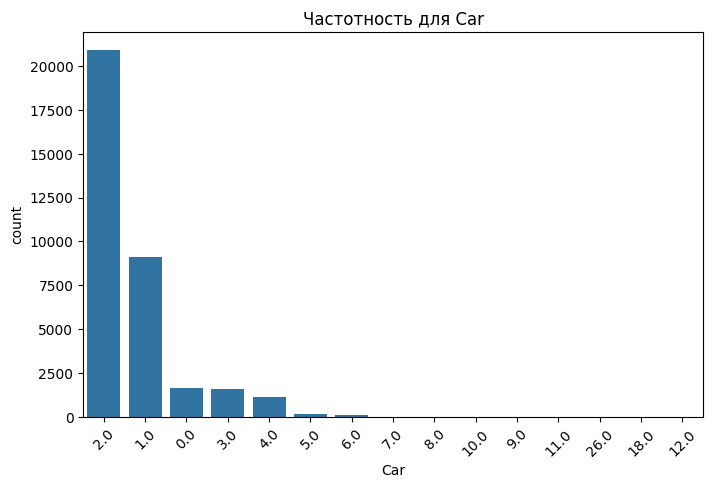

In [ ]:
for feature in ['Rooms', 'Bathroom', 'Car']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=no_strings, x=feature, order=no_strings[feature].value_counts().index)
    plt.title(f'Частотность для {feature}')
    plt.xticks(rotation=45)
    plt.show()

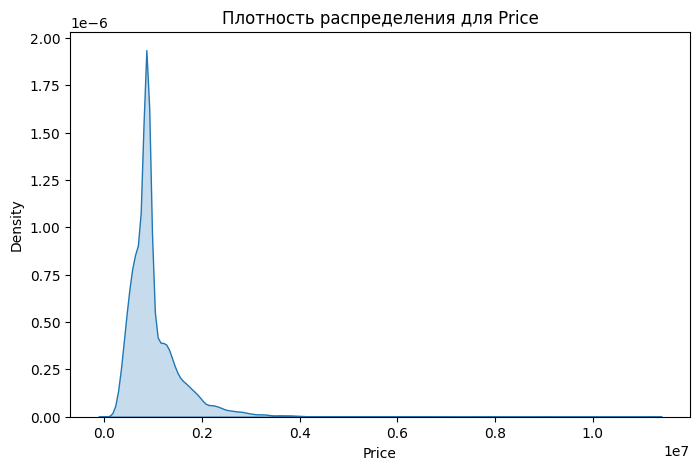

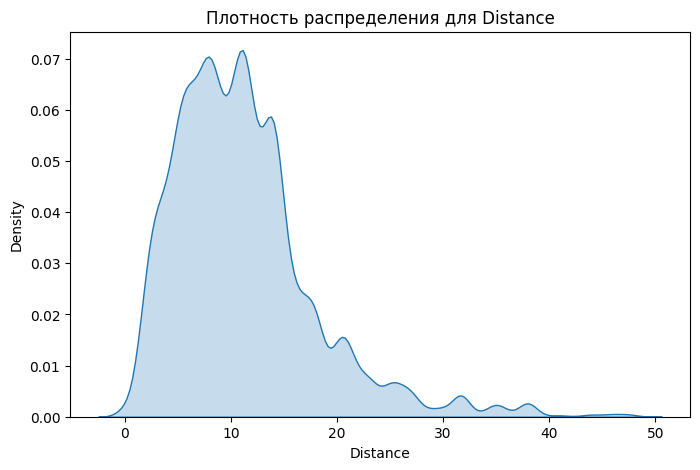

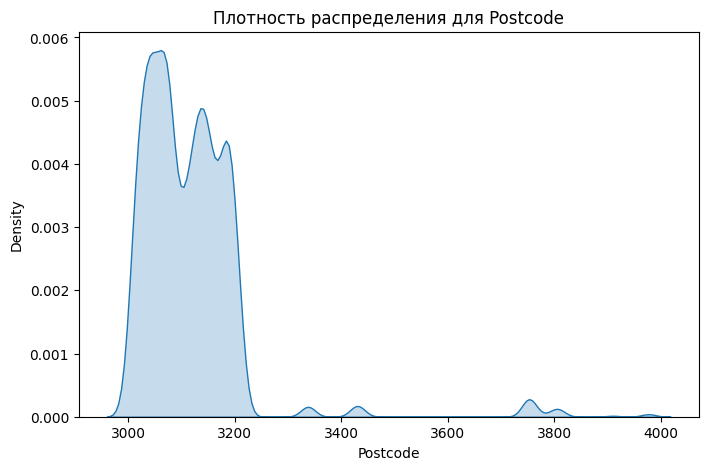

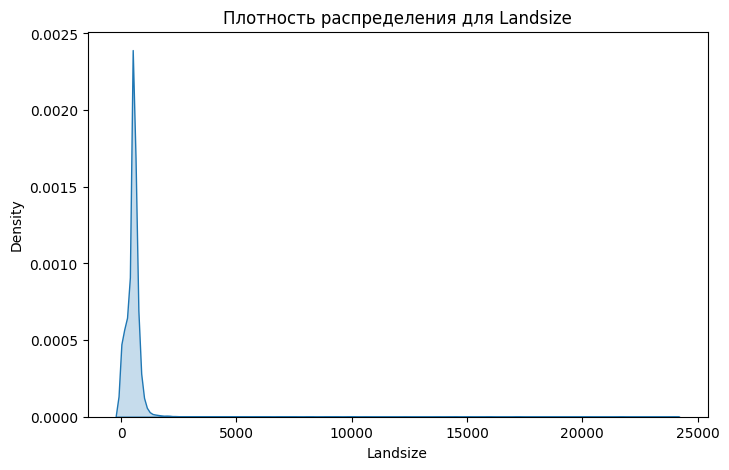

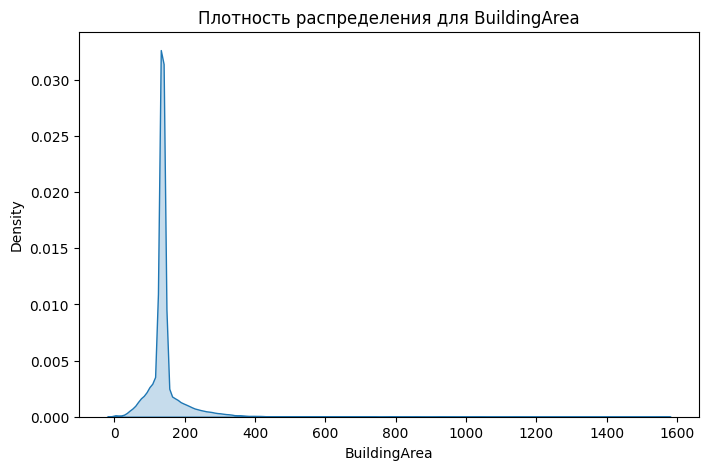

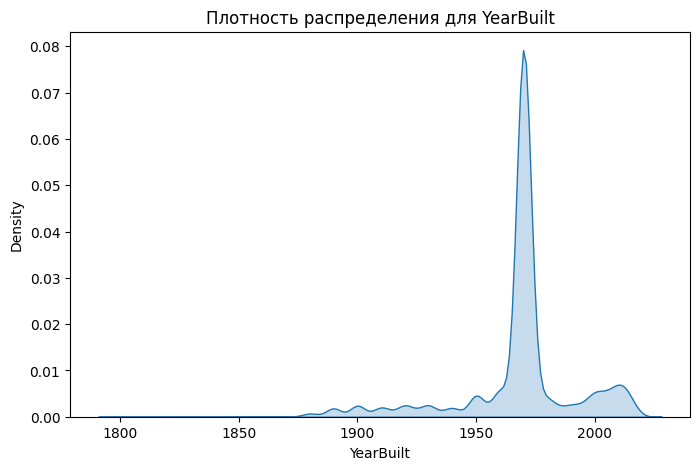

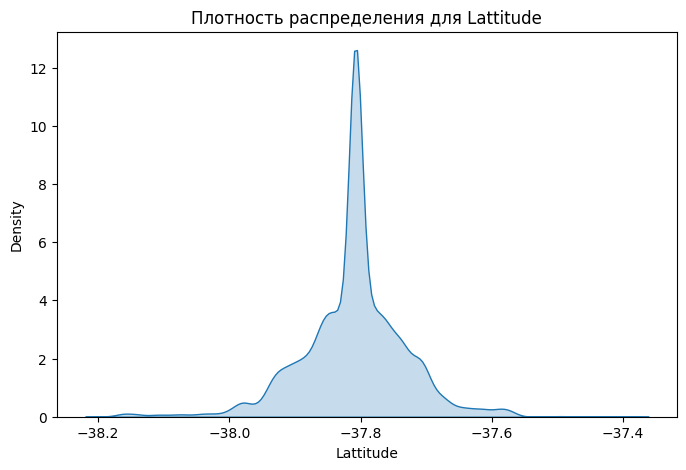

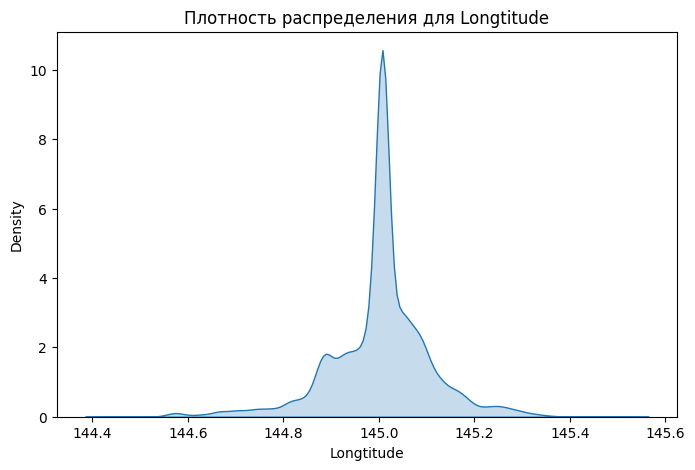

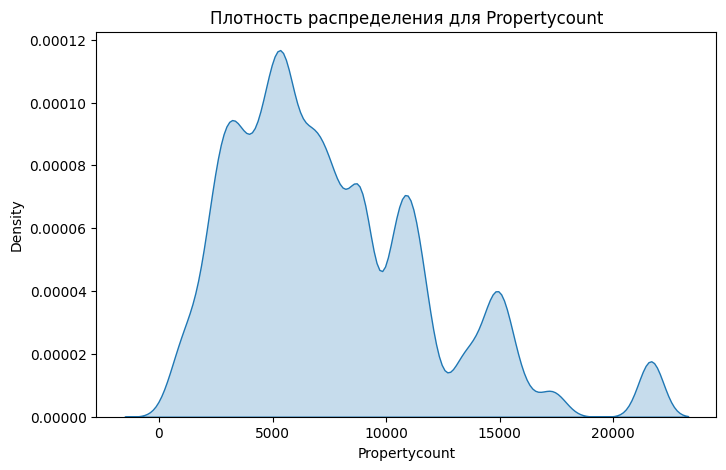

In [ ]:
for feature in ['Price', 'Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=no_strings, x=feature, fill=True)
    plt.title(f'Плотность распределения для {feature}')
    plt.show()

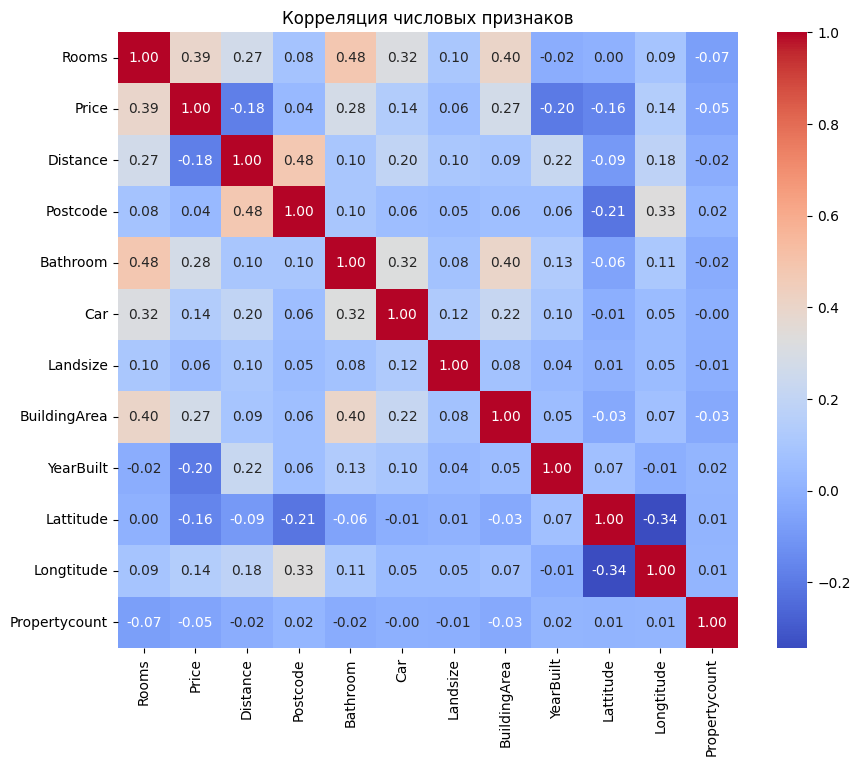

In [ ]:
correlation_matrix = no_strings.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция числовых признаков')
plt.show()

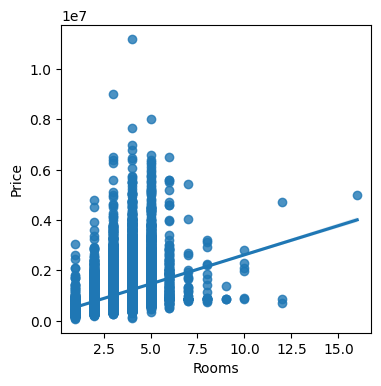

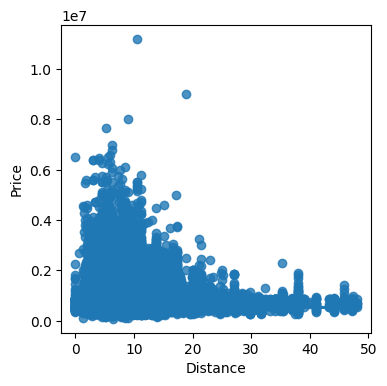

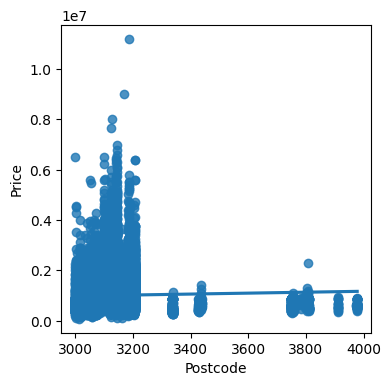

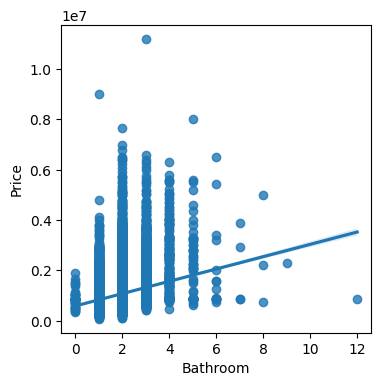

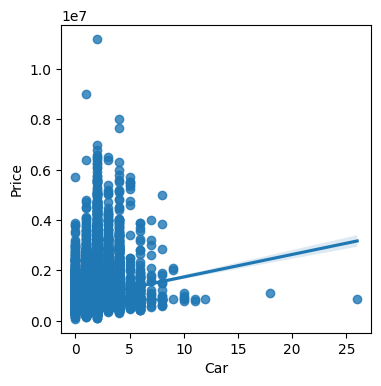

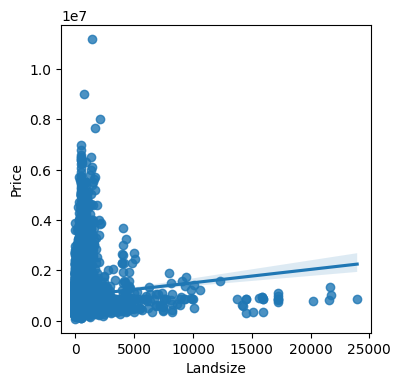

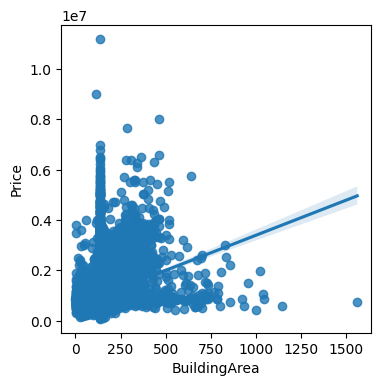

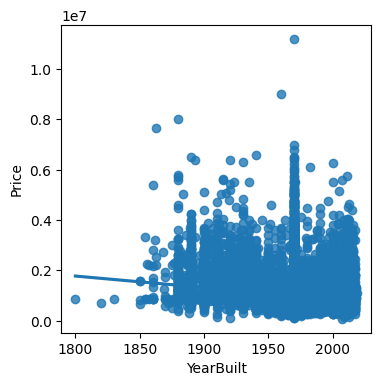

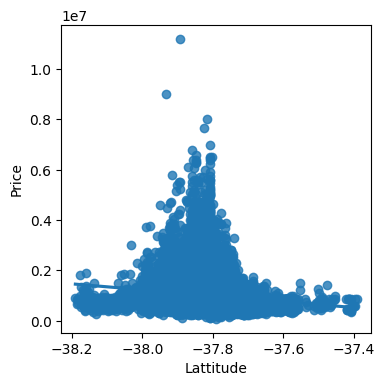

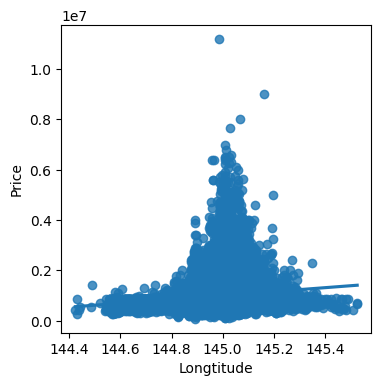

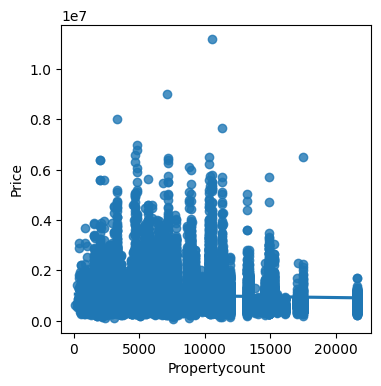

In [ ]:
for column in no_strings:
  if column == 'Price':
     continue
  plt.figure(figsize = (4,4))
  sns.regplot(data = no_strings, x = column, y = 'Price')
  plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = no_strings.drop(columns=['Price'])
y = no_strings['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape)

(24381, 11) (10449, 11)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

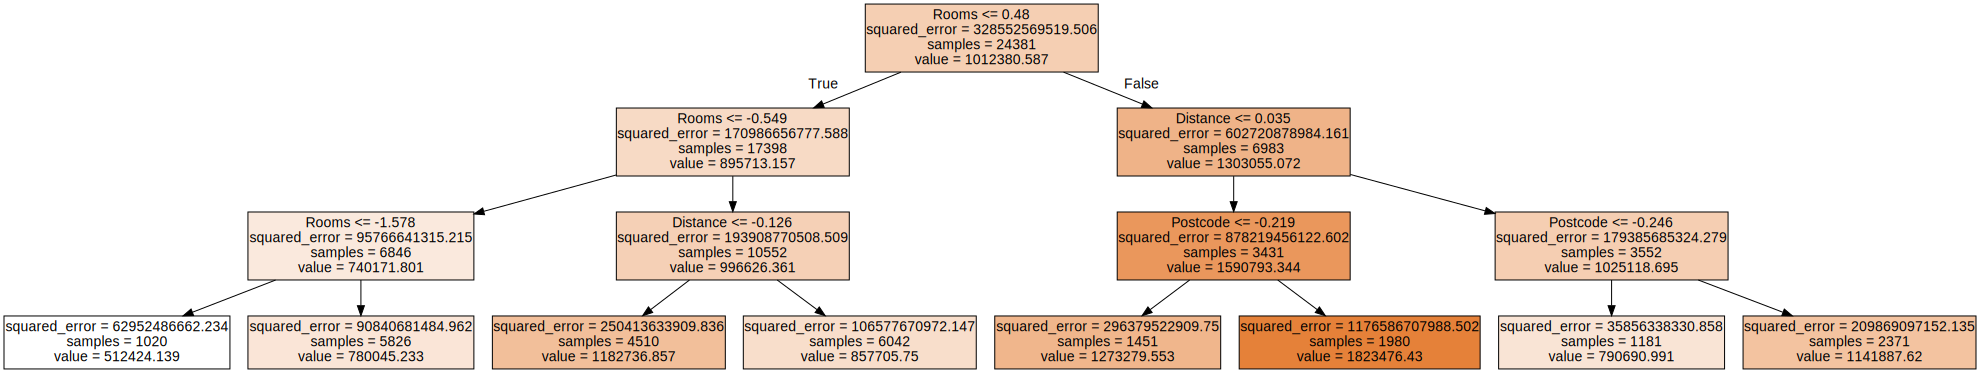

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None,
                                feature_names=X.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")

<Figure size 2500x2000 with 0 Axes>

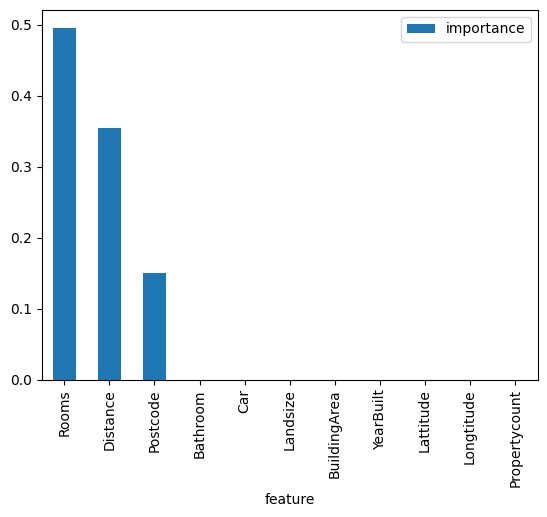

In [ ]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':X.columns, 'importance': dtr.feature_importances_})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [ ]:
y_pred_dtr = dtr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_dtr)
print(f"R^2: {r2:.2f}")

RMSE: 484236.94
R^2: 0.28


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def get_top_features(coef, top_n=3):
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coef
    })
    coef_df['Importance'] = np.abs(coef_df['Coefficient'])

    return coef_df.nlargest(top_n, 'Importance')

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Коэффициенты:')
print(reg.coef_)
print()

print('Cвободный член:')
print(reg.intercept_)
print()

print('Наиболее значимые признаки:')
get_top_features(reg.coef_)

Коэффициенты:
[ 215152.13453848 -209579.62776887   67227.3105436    40009.26502636
   23917.15031234   18354.21810674   60844.93931553  -73600.34032125
  -75116.8288685    41226.69887623  -15391.81347418]

Cвободный член:
1012380.5866453294

Наиболее значимые признаки:


,Feature,Coefficient,Importance
0,Rooms,215152.134538,215152.134538
1,Distance,-209579.627769,209579.627769
8,Lattitude,-75116.828869,75116.828869


In [ ]:
y_pred_reg = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_reg)
print(f"R^2: {r2:.2f}")

RMSE: 464068.65
R^2: 0.34


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

print('Коэффициенты:')
print(ridge.coef_)
print()

print('Cвободный член:')
print(ridge.intercept_)
print()

print('Наиболее значимые признаки:')
get_top_features(ridge.coef_)

Коэффициенты:
[ 215144.45581515 -209570.78717513   67222.44510414   40011.99570671
   23916.76930028   18353.82721728   60845.32023393  -73601.06608962
  -75115.2031746    41226.83316286  -15391.75269978]

Cвободный член:
1012380.5866453294

Наиболее значимые признаки:


,Feature,Coefficient,Importance
0,Rooms,215144.455815,215144.455815
1,Distance,-209570.787175,209570.787175
8,Lattitude,-75115.203175,75115.203175


In [ ]:
y_pred_ridge = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_ridge)
print(f"R^2: {r2:.2f}")

RMSE: 464068.78
R^2: 0.34


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

print('Коэффициенты:')
print(lasso.coef_)
print()

print('Cвободный член:')
print(lasso.intercept_)
print()

print('Наиболее значимые признаки:')
get_top_features(lasso.coef_)

Коэффициенты:
[ 215151.77217309 -209578.43939323   67226.44341933   40009.19204976
   23916.68726197   18353.75888273   60844.71472985  -73600.00664469
  -75116.51038674   41226.48319879  -15391.32208855]

Cвободный член:
1012380.5866453294

Наиболее значимые признаки:


,Feature,Coefficient,Importance
0,Rooms,215151.772173,215151.772173
1,Distance,-209578.439393,209578.439393
8,Lattitude,-75116.510387,75116.510387


In [ ]:
y_pred_lasso = lasso.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_lasso)
print(f"R^2: {r2:.2f}")

RMSE: 464068.66
R^2: 0.34


In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(random_state=42)
elastic.fit(X_train, y_train)

print('Коэффициенты:')
print(elastic.coef_)
print()

print('Cвободный член:')
print(elastic.intercept_)
print()

print('Наиболее значимые признаки:')
get_top_features(elastic.coef_)

Коэффициенты:
[ 125867.94053749 -107617.73079938   21031.09529626   54783.62294251
   20594.14649355   13001.01623999   57044.63228607  -65365.0272948
  -51182.38901047   35777.79196661  -12867.99490124]

Cвободный член:
1012380.5866453319

Наиболее значимые признаки:


,Feature,Coefficient,Importance
0,Rooms,125867.940537,125867.940537
1,Distance,-107617.730799,107617.730799
7,YearBuilt,-65365.027295,65365.027295


In [ ]:
y_pred_elastic = elastic.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_elastic)
print(f"R^2: {r2:.2f}")

RMSE: 478255.04
R^2: 0.29


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# n_estimators - количество деревьев в лесу
# max_depth - максимальная глубина каждого дерева
# min_samples_leaf - минимальное количество образцов в листьях
param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

rf = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

grid = GridSearchCV(rf, param_grid, cv=10,
                    scoring='neg_mean_squared_error', verbose=2)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=25; total time=   0.5s
[CV] END ...max_depth=5, min_samples_leaf=1, n

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_best = grid.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_jobs=2,
                      random_state=0)

<Figure size 2500x2000 with 0 Axes>

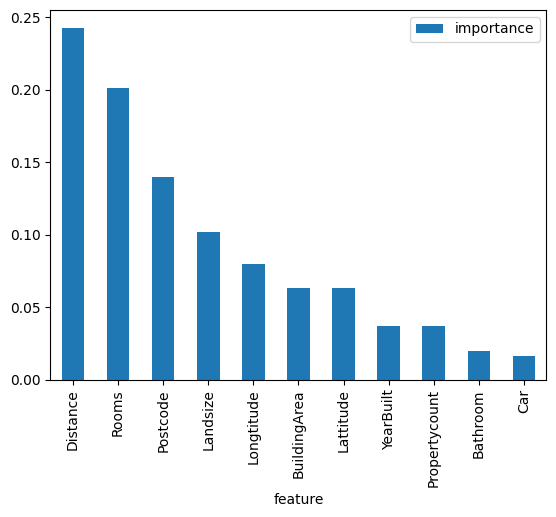

In [ ]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':X.columns, 'importance': np.round(rf_best.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [ ]:
y_pred_rf = rf_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE: {rmse:.2f}")

r2 = r2_score(y_test, y_pred_rf)
print(f"R^2: {r2:.2f}")

RMSE: 424250.81
R^2: 0.44
